# Tests / Experiments

In [15]:
from relaxed import *
from matplotlib import pyplot as plt
from generate import save, load, generate

### Generating two problems to run tests on

In [16]:
import config

test_path_one =  'sample_problems/test_one.json'
test_path_two =  'sample_problems/test_two.json'

# Overriding configuration from config.py.
TASK_COUNT = 500
DEADLINE = 50
MAX_PROFIT = 10
tasks_one = generate(
    TASK_COUNT,
    DEADLINE,  
    MAX_PROFIT
)
save(tasks_one, DEADLINE, 0, test_path_one)

# Second instance
TASK_COUNT = 300
DEADLINE = 30
MAX_PROFIT = 20


# If you wish to change algorithm's running parameters
# you can do it here
config.BASE_POPULATION_SIZE = config.BASE_POPULATION_SIZE
config.WORKER_COUNT = config.WORKER_COUNT
config.DEADLINE = config.DEADLINE
config.TASK_COUNT = config.TASK_COUNT
config.MAX_ITER = config.MAX_ITER

Test function

In [17]:
def run_experiment(sizes, plot_interval, path):
    profits = []
    times = []

    print("-- Showing few sample plots for profit calculation over the course of the algorithm --")
    for worker_count in sizes:
        if path == test_path_two:
            tasks_two = generate(
                TASK_COUNT,
                DEADLINE,  
                MAX_PROFIT
            )
            save(tasks_two, DEADLINE, worker_count, test_path_two)
        if worker_count % plot_interval == 0:
            print(f'For {worker_count} workers:')
            (first, tf), (second, ts) = run(3, path, True, override_wc=worker_count)
        else:
            (first, tf), (second, ts) = run(3, path, False, override_wc=worker_count)

        profits.append((first, second))
        times.append((tf, ts))
    
    return profits, times

## Experiment one

### Computation and stats for the same problem, but different numbers of workers

-- Showing few sample plots for profit calculation over the course of the algorithm --
For 5 workers:


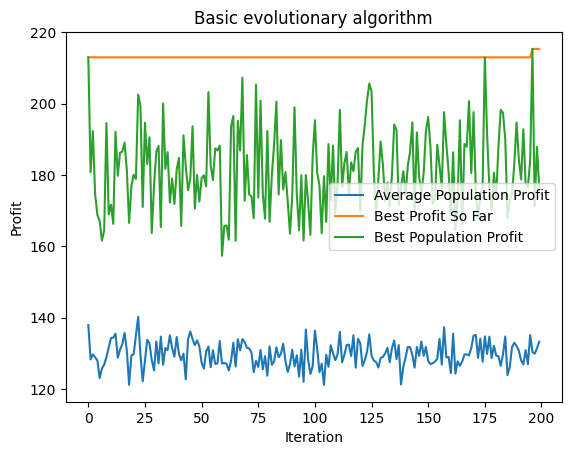

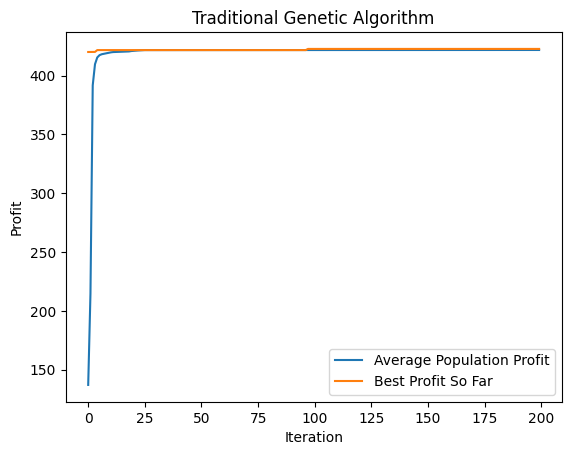

For 10 workers:


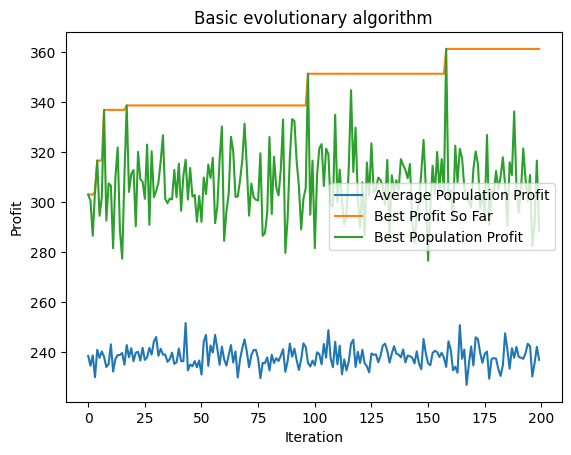

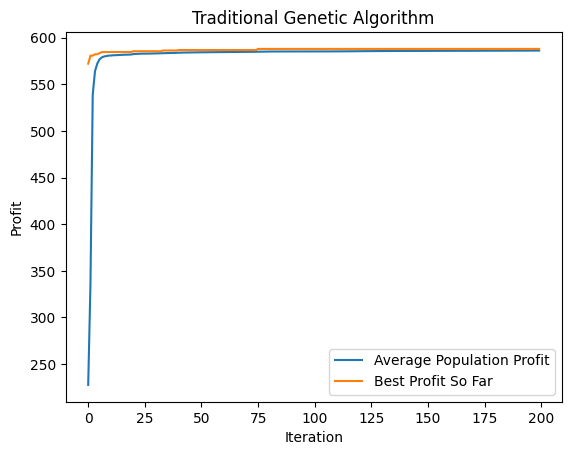

For 15 workers:


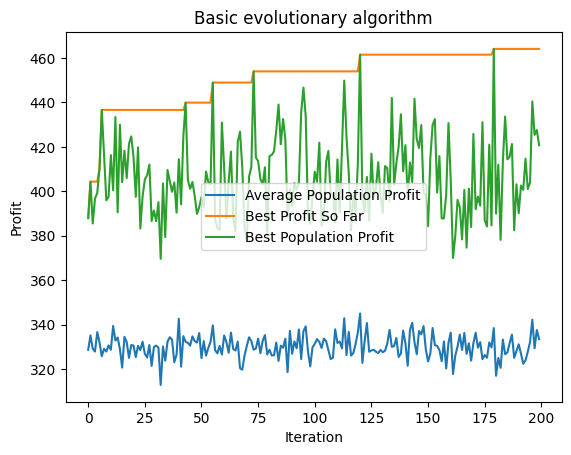

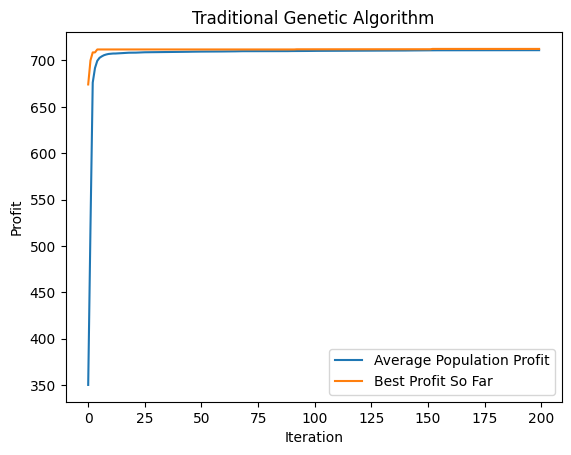

In [18]:
N = 5
M = 20
SIZES_ONE = list(range(
    N, M # will run experiment for  N <= number of workers < M
))

# Will plot algorithmic stats for every (number of workers % PLOT_INTERVAL == 0)
PLOT_INTERVAL = 5
profits_one, times_one = run_experiment(SIZES_ONE, PLOT_INTERVAL, test_path_one)

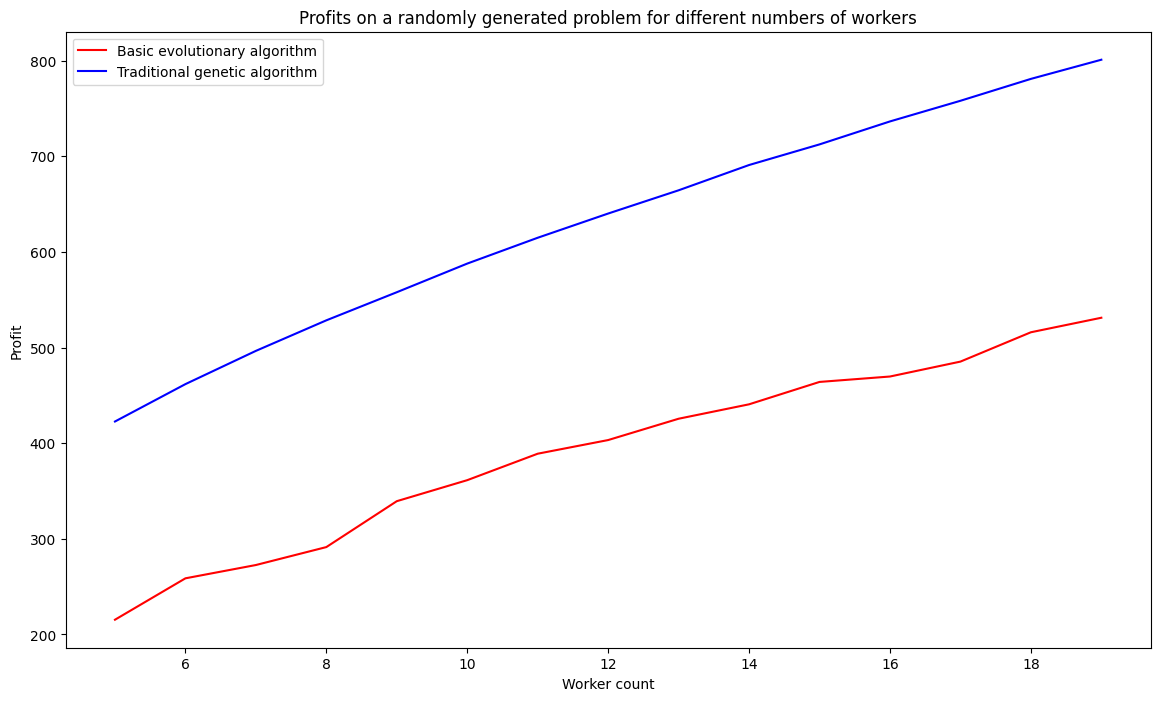

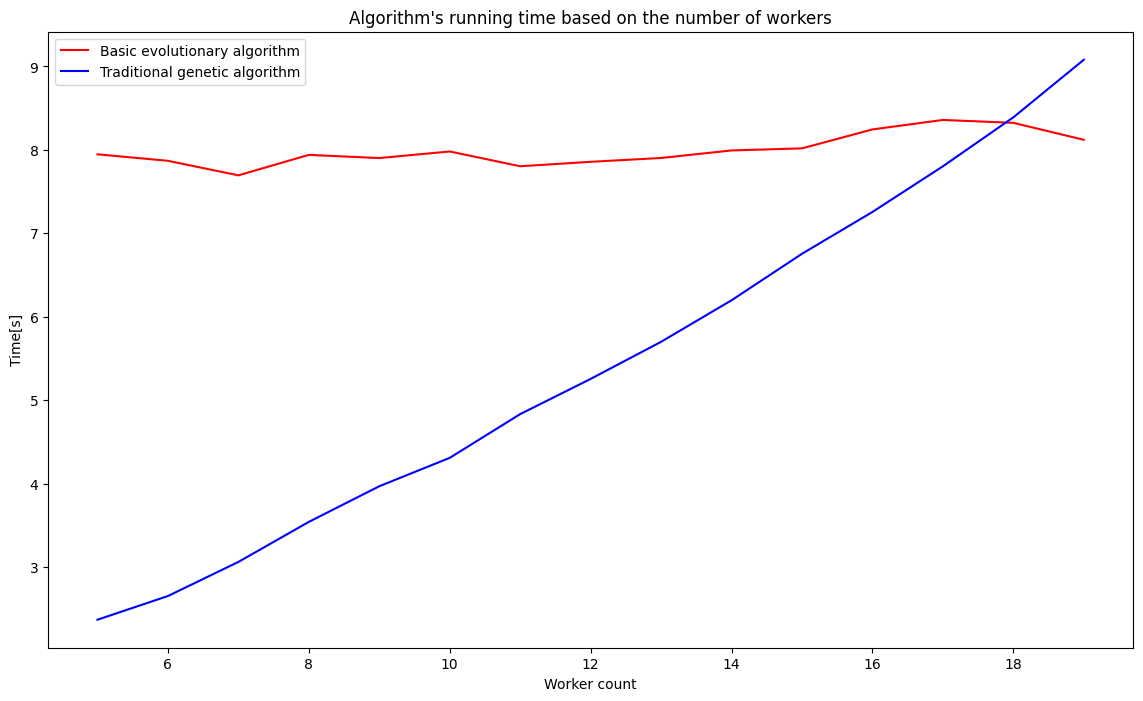

In [19]:
plt.figure(figsize=(14, 8))
plt.title(label="Profits on a randomly generated problem for different numbers of workers")
plt.plot(SIZES_ONE, list(map(lambda x: x[0], profits_one)), 'red', label="Basic evolutionary algorithm")
plt.plot(SIZES_ONE, list(map(lambda x: x[1], profits_one)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(14, 8))
plt.title(label="Algorithm's running time based on the number of workers")
plt.plot(SIZES_ONE, list(map(lambda x: x[0], times_one)), 'red', label="Basic evolutionary algorithm")
plt.plot(SIZES_ONE, list(map(lambda x: x[1], times_one)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Time[s]")
plt.show()

## Experiment two

### Computation and stats for different problems and different numbers of workers

-- Showing few sample plots for profit calculation over the course of the algorithm --
For 15 workers:


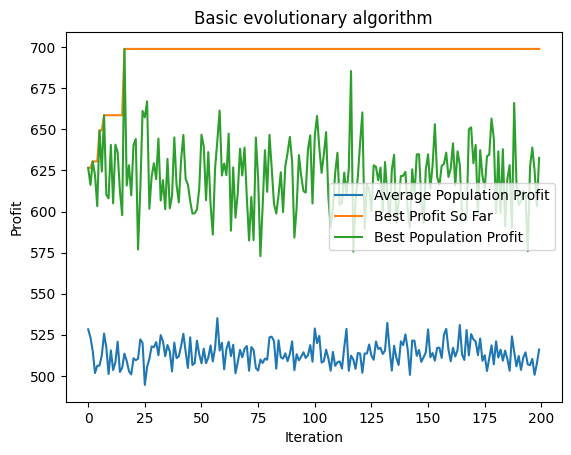

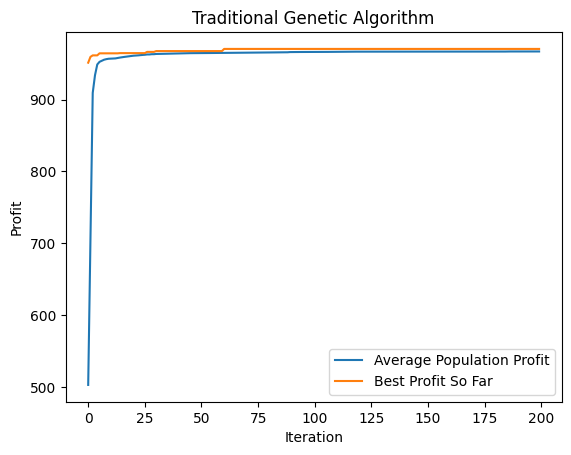

For 20 workers:


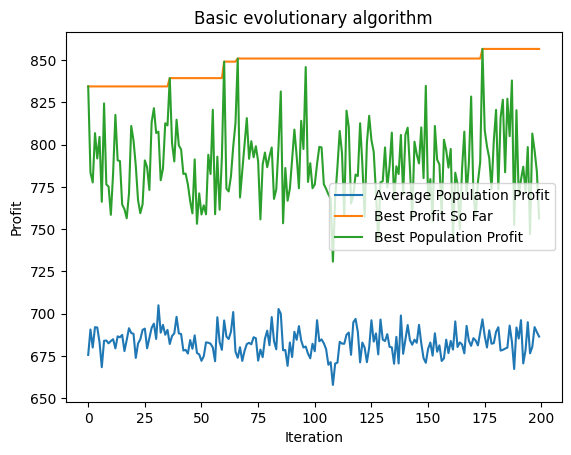

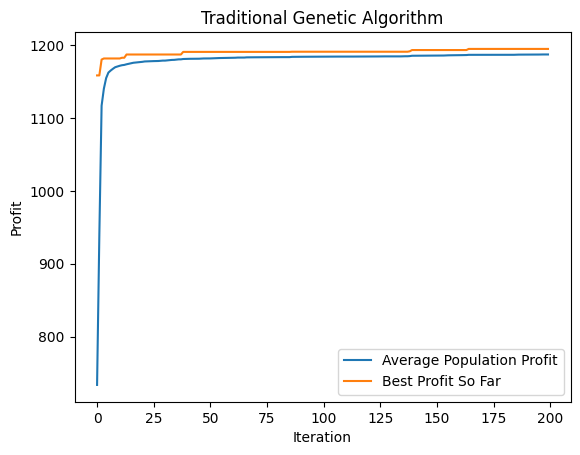

For 25 workers:


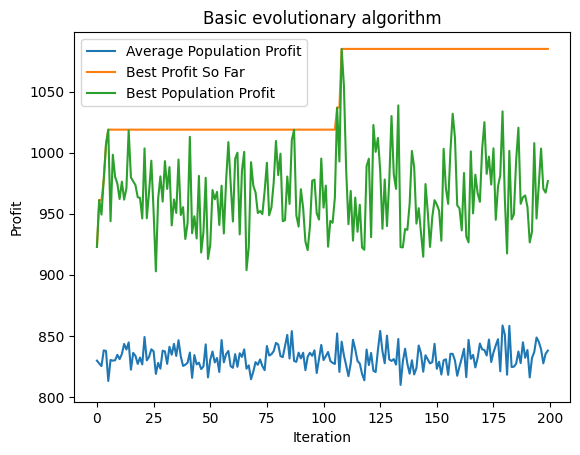

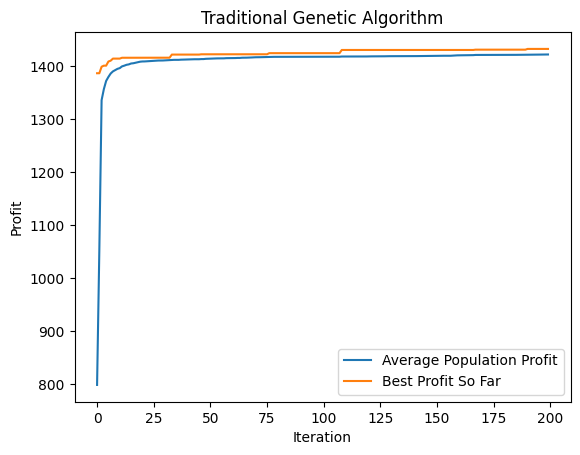

In [20]:
NN = 15
MM = 30
SIZES_TWO = list(range(
    NN, MM # will run experiment for  NN <= number of workers < MM
))

# Will plot algorithmic stats for every (number of workers % PLOT_INTERVAL == 0)
PLOT_INTERVAL = 5
profits_two, times_two = run_experiment(SIZES_TWO, PLOT_INTERVAL, test_path_two)

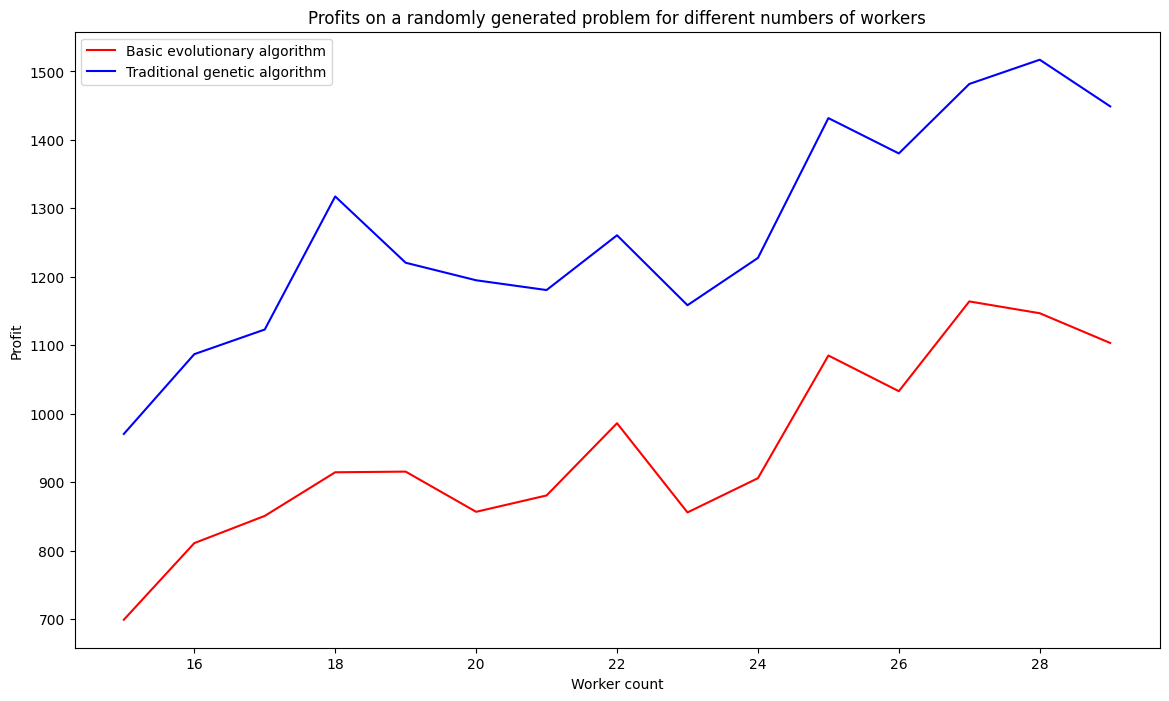

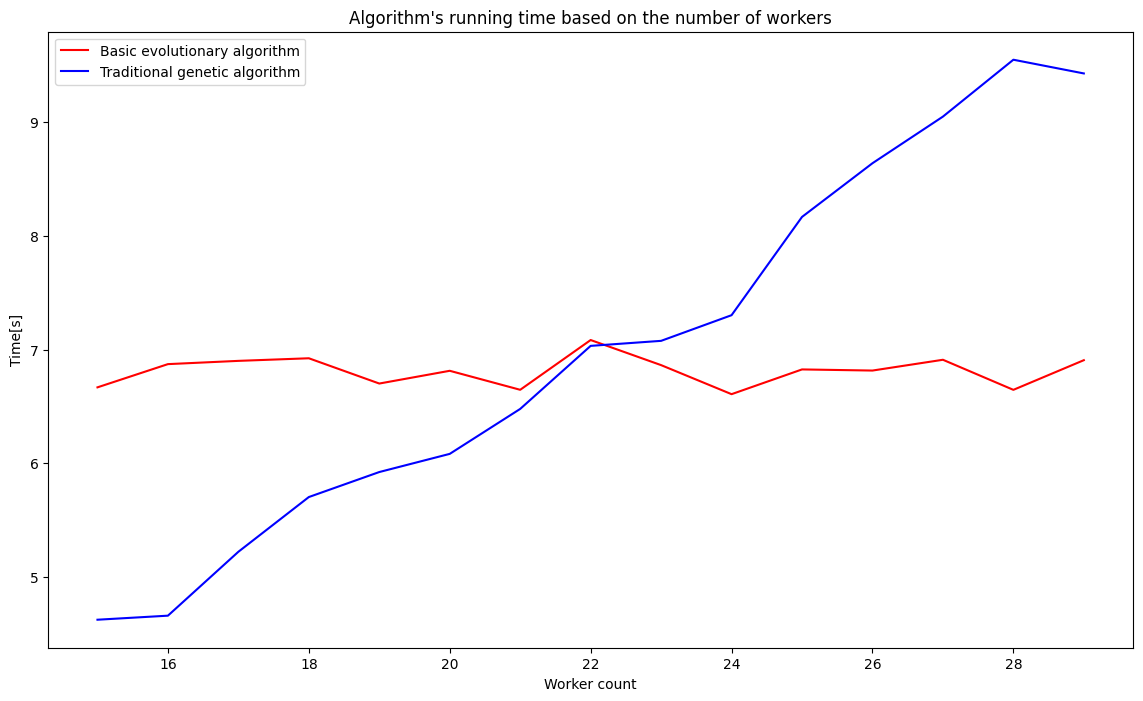

In [21]:
plt.figure(figsize=(14, 8))
plt.title(label="Profits on a randomly generated problem for different numbers of workers")
plt.plot(SIZES_TWO, list(map(lambda x: x[0], profits_two)), 'red', label="Basic evolutionary algorithm")
plt.plot(SIZES_TWO, list(map(lambda x: x[1], profits_two)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(14, 8))
plt.title(label="Algorithm's running time based on the number of workers")
plt.plot(SIZES_TWO, list(map(lambda x: x[0], times_two)), 'red', label="Basic evolutionary algorithm")
plt.plot(SIZES_TWO, list(map(lambda x: x[1], times_two)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Time[s]")
plt.show()